In [1]:
from ase.spacegroup import crystal
from ase.build import surface, make_supercell,cut
from ase.io import write

In [2]:
# Parámetros de red del rutilo TiO2
a = 4.5937  # Longitud del eje a (Å)
c = 2.9581  # Longitud del eje c (Å)
u = 0.305   # Posición fraccionaria del oxígeno

# Crear la celda base de rutilo (TiO2)
rutile = crystal(
    symbols=['Ti', 'O'],  # Especies atómicas
    basis=[
        [0, 0, 0],         # Ti en (0, 0, 0)
        [u, u, 0],         # O en (u, u, 0)
        [-u, -u, 0],       # O en (-u, -u, 0)
    ],
    spacegroup=136,        # Grupo espacial P42/mnm
    cellpar=[a, a, c, 90, 90, 90],  # Parámetros de la celda
)

# Generar la superficie (110)
surface_tio2 = surface(rutile, (1, 1, 0), layers=1, vacuum=8.0)  # 3 capas y 8 Å de vacío

# Expandir la celda a una supercelda (2x2x2)
#supercell = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])

# Ajustar el número de átomos a 24 
supercell = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Superficie 2x2x2

# Exportar como archivo para visualización en Vesta
write('TiO2_110_surface.xyz', supercell)

e:\Anaconda\Lib\site-packages\ase\spacegroup\spacegroup.py:430: UserWarning: scaled_positions 1 and 2 are equivalent
  warnings.warn('scaled_positions %d and %d '


In [3]:
from ase.io import write
from ase import Atom

supercell = make_supercell(surface_tio2, [[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Redefinir la supercelda para evitar duplicados
# Posición del átomo de flúor sobre un átomo de titanio
pos_ti = supercell.positions[0]  # Índice ajustado manualmente para Ti
pos_o = supercell.positions[1]   # Índice ajustado manualmente para O

# Añadir átomos de flúor
fluor_ti = pos_ti + [0, 0, 1.5]  # F a 1.5 Å sobre Ti
fluor_o = pos_o + [0, 0, 1.5]    # F a 1.5 Å sobre O
supercell.append(Atom('F', fluor_ti))
supercell.append(Atom('F', fluor_o))

# Definir pseudopotenciales con los nombres exactos
pseudopotentials = {
    'Ti': 'Ti.pbe-spn-kjpaw_psl.1.0.0.UPF',  # Pseudopotencial para Ti
    'O': 'O.pbe-n-kjpaw_psl.1.0.0.UPF',         # Pseudopotencial para O
    'F': 'F.pbe-n-kjpaw_psl.1.0.0.UPF',         # Pseudopotencial para F
}
# Exportar como archivo para visualización en Vesta
write('TiO2_110_F_positions.xyz', supercell)
# Exportar archivo para Quantum ESPRESSO
write('TiO2_110_F_positions.pwi', supercell, format='espresso-in', pseudopotentials=pseudopotentials)


In [4]:
from ase.io import read

# Cargar el archivo pw.out
atoms = read('pw.out') 

# Mostrar información sobre el sistema
print(atoms)
print(atoms.positions)  # Posiciones de los átomos
print(atoms.get_potential_energy())  # Energía potencial total



Atoms(symbols='Ti2O4Ti2O4Ti2O4Ti2O4F2', pbc=True, cell=[12.99294567702021, 5.916194891628705, 17.981418261418316], calculator=SinglePointDFTCalculator(...))
[[ 0.          0.          7.99999962]
 [ 3.24823642  1.47904937  7.99999962]
 [ 0.          0.          9.98142384]
 [ 3.24823642  0.          9.26681182]
 [ 1.2668122   1.47904937  7.99999962]
 [ 5.22966064  1.47904937  7.99999962]
 [ 0.          2.95810004  7.99999962]
 [ 3.24823642  4.43714942  7.99999962]
 [ 0.          2.95810004  9.98142384]
 [ 3.24823642  2.95810004  9.26681182]
 [ 1.2668122   4.43714942  7.99999962]
 [ 5.22966064  4.43714942  7.99999962]
 [ 6.49647284  0.          7.99999962]
 [ 9.74470926  1.47904937  7.99999962]
 [ 6.49647284  0.          9.98142384]
 [ 9.74470926  0.          9.26681182]
 [ 7.76328504  1.47904937  7.99999962]
 [11.72613347  1.47904937  7.99999962]
 [ 6.49647284  2.95810004  7.99999962]
 [ 9.74470926  4.43714942  7.99999962]
 [ 6.49647284  2.95810004  9.98142384]
 [ 9.74470926  2.9581000

In [5]:
from ase.visualize import view
view(atoms)  # Esto abre una ventana interactiva para visualizar la estructura


<Popen: returncode: None args: ['e:\\Anaconda\\python.exe', '-m', 'ase', 'gu...>

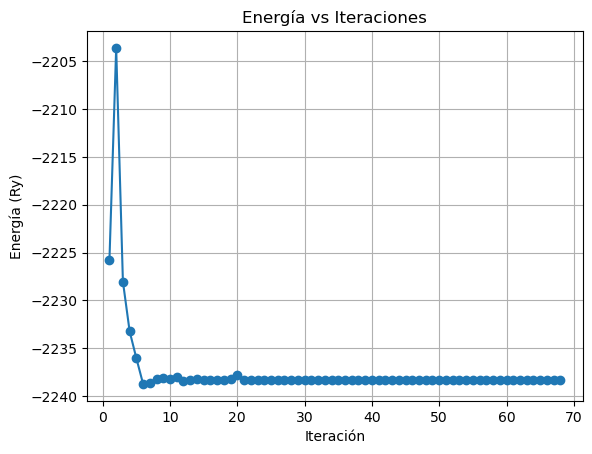

In [6]:
import re
import matplotlib.pyplot as plt

# Cargar el archivo pw.out
Result_TiO2F = 'pw.out'
with open(Result_TiO2F, 'r') as file:
    content = file.read()

# Buscar todas las energías en las iteraciones usando expresión regular
energies = re.findall(r'total energy\s+=\s+(-?\d+\.\d+)', content)

# Convertir las energías a tipo flotante
energies = [float(e) for e in energies]

# Graficar energía vs iteraciones
plt.plot(range(1, len(energies) + 1), energies,'-o')
plt.xlabel('Iteración')
plt.ylabel('Energía (Ry)')
plt.title('Energía vs Iteraciones')
plt.grid(True)
plt.show()

